Name: Avani Gupta <br>
Roll: 2019121004 <br>


## Assignment 1 - Basic understanding and masking of brain images
with Nilearn

In [1]:
# !pip install nilearn

In [2]:
# !pip install nibabel

## Objective
To understand, manipulate and transform Neuroimaging data for practicing Machine Learning or Deep
Learning. This could be an opportunity to introduce Nilearn - a Python package that will serve our
objectives. Nilearn is a open-source software with good documentation, plenty of examples in the gallery
and easy-to-use. <br>
Nilearn provides tools for analysis techniques like functional connectivity, multivariate (machine-learning
based) "decoding", but also more "basic" tools like image manipulation and visualization. From this
assignment, we will learn how to use the basic tools from Nilearn for downloading and processing
Magnetic Resonance Imaging (MRI) data. <br>
The installation of the Nilearn is pretty straight forward following install nilearn documentation.
If you want to read an entire functionality that Nilearn offers? Go through their online website or check out
this article.

In [3]:
# This might take a while, depending on your internet speed
from nilearn import datasets
haxby_dataset = datasets.fetch_haxby(data_dir=None)
# by default this function returns images of second subject from the Haxby study
# ignore warnings or if you don't want warnings, uncomment and run below code
# import warnings
# warnings.simplefilter("ignore")

/home/avani/miniconda3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [4]:
print(datasets.get_data_dirs())

['/home/avani/nilearn_data']


In [5]:
# The different pieces of information
print(sorted(list(haxby_dataset.keys())))

['anat', 'description', 'func', 'mask', 'mask_face', 'mask_face_little', 'mask_house', 'mask_house_little', 'mask_vt', 'session_target']


In [6]:
print(haxby_dataset['description'].decode("utf-8"))

Haxby 2001 results


Notes
-----
Results from a classical fMRI study that investigated the differences between
the neural correlates of face versus object processing in the ventral visual
stream. Face and object stimuli showed widely distributed and overlapping
response patterns.

Content
-------
The "simple" dataset includes
    :'func': Nifti images with bold data
    :'session_target': Text file containing session data
    :'mask': Nifti images with employed mask
    :'session': Text file with condition labels


The full dataset additionally includes
    :'anat': Nifti images with anatomical image
    :'func': Nifti images with bold data
    :'mask_vt': Nifti images with mask for ventral visual/temporal cortex
    :'mask_face': Nifti images with face-reponsive brain regions
    :'mask_house': Nifti images with house-reponsive brain regions
    :'mask_face_little': Spatially more constrained version of the above
    :'mask_house_little': Spatially more constrained version of the abov

In [7]:
# The different pieces of information
print(sorted(list(haxby_dataset.keys())))

['anat', 'description', 'func', 'mask', 'mask_face', 'mask_face_little', 'mask_house', 'mask_house_little', 'mask_vt', 'session_target']


In [8]:
# TODO 1: print anatomical and functional image to locate their paths
print(haxby_dataset['anat']) # insert anatomical image key here
print(haxby_dataset['func']) # insert functional image key here

['/home/avani/nilearn_data/haxby2001/subj2/anat.nii.gz']
['/home/avani/nilearn_data/haxby2001/subj2/bold.nii.gz']


In [9]:
print(haxby_dataset['mask_vt']), print(haxby_dataset['mask_face'])

['/home/avani/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz']
['/home/avani/nilearn_data/haxby2001/subj2/mask8b_face_vt.nii.gz']


(None, None)

In [10]:
from nilearn import image

In [11]:
# TODO 2: Load anatomical image and functional image
anatomical = image.load_img(img=haxby_dataset['anat']) # specify the relevant input here
type(anatomical)
functional = image.load_img(img=haxby_dataset['func']) # specify the functional image
type(functional)

nibabel.nifti1.Nifti1Image

In [12]:
anatomical_image_shape = anatomical.shape
functional_image_shape = functional.shape
assert(anatomical_image_shape == (124, 256, 256, 1))
assert(functional_image_shape == (40, 64, 64, 1452))

In [13]:
for k in haxby_dataset:
    try:
        all_mask_images = image.load_img(img = haxby_dataset[k])
        print(k, all_mask_images.shape)
    except:
        print("eror in ",k)

anat (124, 256, 256, 1)
func (40, 64, 64, 1452)
eror in  session_target
mask_vt (40, 64, 64, 1)
mask_face (40, 64, 64, 1)
mask_house (40, 64, 64, 1)
mask_face_little (40, 64, 64, 1)
mask_house_little (40, 64, 64, 1)
mask (40, 64, 64)
eror in  description


In [14]:
import nilearn
nilearn.EXPAND_PATH_WILDCARDS = False

In [15]:
import glob
glob.glob('/home/avani/nilearn_data/haxby2001/subj2/mask*'),
# TODO 3: Wildcard like path should be specificied to load all mask images at once
all_mask_images = image.load_img(glob.glob('/home/avani/nilearn_data/haxby2001/subj2/mask*'))
assert(all_mask_images.shape == (40, 64, 64, 5))

In [16]:
from nilearn import plotting

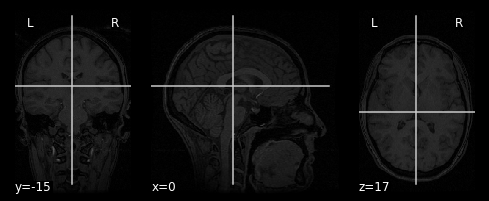

In [17]:
plotting.plot_anat(anatomical)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook

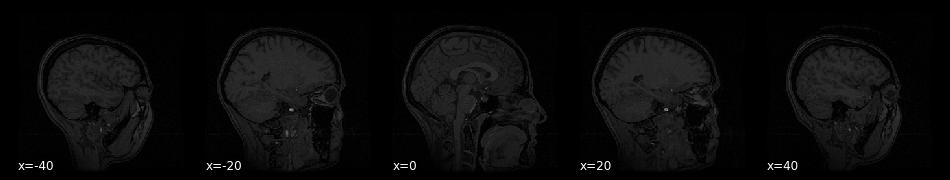

In [18]:
plotting.plot_anat(anatomical, display_mode='x', cut_coords=[-40, -20, 0, 20, 40])

/home/avani/miniconda3/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


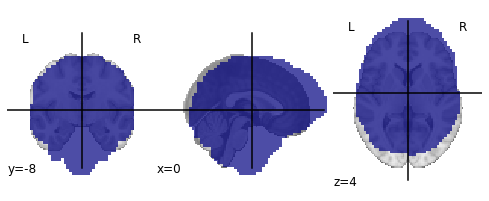

In [19]:
# TODO 4: Specify the mask image input to plot ROI images
mask_image = image.load_img(img = haxby_dataset['mask'])
plotting.plot_roi(roi_img = mask_image)

# 2. Image manipulation
Average functional image over time (compute mean image given 4D)

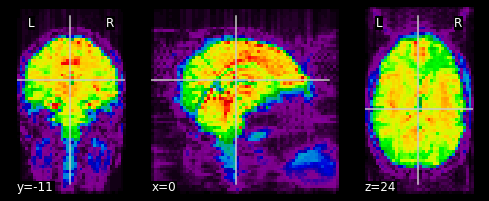

In [20]:
# Since we already imported image module from Nilearn, we can use it again here
# TODO 5: Specify functional image as input as it is 4D and we want to average in time
mean_functional_image = image.mean_img(imgs=functional)
assert(mean_functional_image.shape == (40, 64, 64))
# TODO 6: Visualize the mean image using `plotting.plot_epi`
plotting.plot_epi(epi_img=mean_functional_image)
plotting.show()

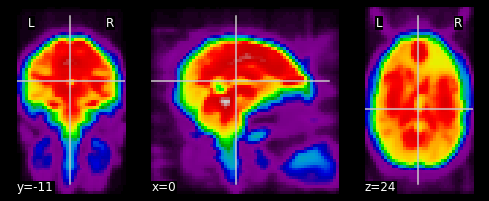

In [21]:
# TODO 7: Specify the mean functional image
smooth_mean_functional_image = image.smooth_img(mean_functional_image, fwhm=8)
# Visualize the smoothed image using `plotting.plot_epi`
# TODO 8: Specify the input

plotting.plot_epi(epi_img=smooth_mean_functional_image)

In [22]:
log_image = image.math_img("np.log(img)", img=anatomical)
# negate the image
negate_image = image.math_img("-img", img=anatomical)

<string>:1: RuntimeWarning: divide by zero encountered in log


In [23]:
# TODO 9: Use addition symbol with two images
add_anatomical_img_with_log_img = image.math_img("img1 + img2",img1=anatomical, img2=log_image)

In [24]:
functional_mean_image = image.math_img("np.mean(img,axis=3)", img=functional)
functional_std_image = image.math_img("np.std(img,axis=3)", img=functional)


<string>:1: RuntimeWarning: invalid value encountered in true_divide
/home/avani/miniconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


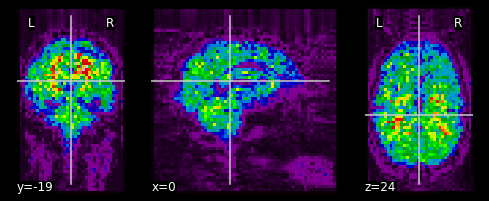

In [25]:
# TODO 10: Use Numpy functions
import numpy as np
tsnr_functional_image = image.math_img("np.divide(img1,img2)", img1=functional_mean_image, img2=functional_std_image)
plotting.plot_epi(tsnr_functional_image)
plotting.show()

In [26]:
# Implement here
# TODO 11: Follow the documentation of resample_to_img
resampled_f_img = image.resample_to_img(anatomical, functional)
resampled_f_img.shape

/home/avani/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(40, 64, 64, 1)

## 3. Masking brain images for easier Machine Learning
A common operation in fMRI analyses is masking: extracting particular voxels from the entire dataset,
usually based on a binary brain mask. Masking, at least in fMRI analyses, is often done on the spatial
dimensions of 4D images; as such, masking can be seen as a operation that takes in a 4D image with
spatial dimensions X*Y*Z and temporal dimension T and returns a T*K 2D array, where K is the number of
voxels that falls under the masking procedure.

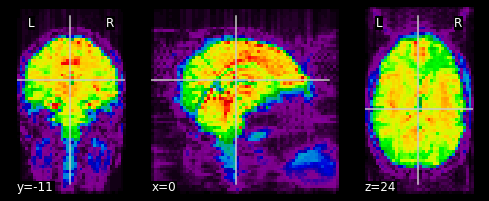

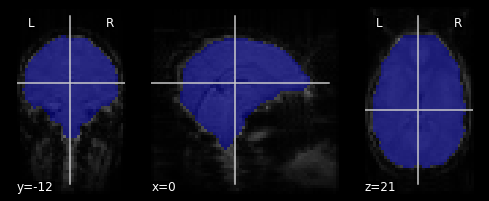

In [27]:
from nilearn import masking
# Let's compute the epi mask
func_mask = masking.compute_epi_mask(mean_functional_image)
# Visualize the mask that is computed on the mean functional image
plotting.plot_epi(mean_functional_image)
plotting.plot_roi(func_mask, mean_functional_image)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook

In [28]:
print("Before masking, our data has shape %s ..." % (functional.shape,))
functional_masked = masking.apply_mask(functional, func_mask)
print("After masking, shape %s and is a %s" % (functional_masked.shape, type(functional_masked).__name__))

Before masking, our data has shape (40, 64, 64, 1452) ...
After masking, shape (1452, 24083) and is a ndarray


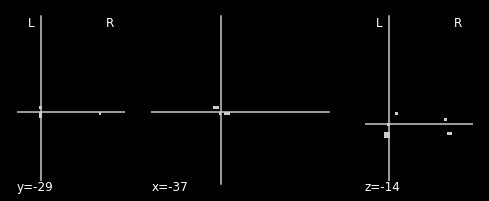

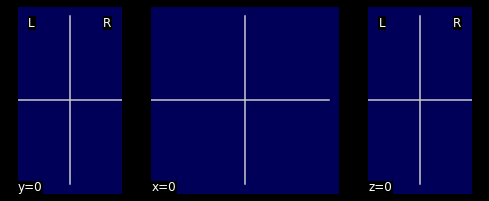

In [29]:
# TODO 12:
# Complete the block with face mask or any other mask by following above demo
mask_face_image = image.load_img(img=haxby_dataset['mask_face'])
mask_face_mean_image = image.math_img("np.mean(img,axis=3)", img=mask_face_image)

face_mask = masking.compute_epi_mask(mask_face_mean_image)

plotting.plot_epi(mask_face_mean_image)
plotting.plot_roi(face_mask, mask_face_mean_image)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook


In [30]:
print("Before masking, our data has shape %s ..." % (mask_face_image.shape,))
face_mask_masked = masking.apply_mask(mask_face_image,face_mask)
print("After masking, shape %s and is a %s" % (face_mask_masked.shape, type(face_mask_masked).__name__))

Before masking, our data has shape (40, 64, 64, 1) ...
After masking, shape (1, 129600) and is a ndarray


In [31]:
from nilearn.input_data import NiftiMasker

In [32]:
masker = NiftiMasker(mask_img=func_mask, verbose=True)

In [33]:
masked_functional_image = masker.fit_transform(functional)
print(masked_functional_image.shape)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


In [34]:
# TODO 13:
# Implement the smoothing and mask strategy parameter here, inspired by above
masker = NiftiMasker(mask_img=func_mask, verbose=True,mask_strategy='epi',smoothing_fwhm=7)
masked_functional_image_epi = masker.fit_transform(functional)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals



TODO 14: Until now we have looked at steps that lead to 2D from 4D. Now,
Implement a simple masking pipeline:
1. Download the fMRI data (4D), a new subject from the Haxby dataset.
E.g., if "subj2 is used already then download "subj1" or "subj3".
2. Implement NiftiMasker, specify mask image while initialization of object
and apply it on the fMRI data
3. Plot the mask image overlayed onto mean of fMRI data
4. Print the masked output, it should be 2D matrix

In [35]:
haxby_dataset2 = datasets.fetch_haxby(subjects=(1,),data_dir=None)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


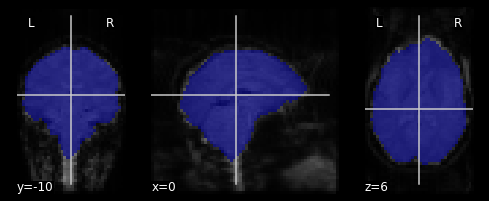

In [36]:
functional2 = image.load_img(img=haxby_dataset2['func']) # specify the functional image
mean_functional_image2 = image.mean_img(imgs=functional2)
func_mask2 = masking.compute_epi_mask(mean_functional_image2)
masker = NiftiMasker(mask_img=func_mask2, verbose=True,mask_strategy='epi',smoothing_fwhm=7)
masked_functional_image2 = masker.fit_transform(functional)

plotting.plot_roi(func_mask2, mean_functional_image2)

In [37]:
masked_functional_image2

array([[ 93.59388 , 327.11993 , 293.88666 , ..., 278.53116 , 388.73108 ,
        353.8531  ],
       [114.69678 , 334.9649  , 292.36948 , ..., 279.6289  , 390.14194 ,
        353.28653 ],
       [115.73061 , 337.62183 , 292.18924 , ..., 279.97122 , 390.23926 ,
        357.27332 ],
       ...,
       [ 99.60875 , 316.6715  , 282.53293 , ..., 243.94974 , 375.11642 ,
        317.52637 ],
       [126.92425 , 327.77097 , 282.43338 , ..., 235.55151 , 372.12915 ,
        317.03613 ],
       [110.802376, 323.73343 , 284.84814 , ..., 241.54353 , 379.34552 ,
        320.89856 ]], dtype=float32)